In [ ]:
import pandas as pd
import sklearn
import numpy as np

data = pd.read_csv("clean_dataset_googleplaystore.csv")

# Préparation / pre traitement pour clustering
on commence par dresser la liste de tous les mots présents dans les titres, avec leur occurence

In [185]:
vocab_occur = {}

for app_name in data["App"] :
  for mot in app_name.split():
    if mot in vocab_occur :
      vocab_occur[mot] += 1
    else :
      vocab_occur[mot] = 1

print(vocab_occur)

{'Photo': 103, 'Editor': 79, '&': 591, 'Candy': 21, 'Camera': 78, 'Grid': 5, 'ScrapBook': 1, 'Coloring': 31, 'book': 7, 'moana': 2, 'U': 25, 'Launcher': 65, 'Lite': 36, '–': 98, 'FREE': 39, 'Live': 101, 'Cool': 4, 'Themes,': 2, 'Hide': 7, 'Apps': 9, 'Sketch': 3, '-': 1102, 'Draw': 20, 'Paint': 8, 'Pixel': 25, 'Number': 42, 'Art': 25, 'Book': 27, 'Paper': 1, 'flowers': 1, 'instructions': 1, 'Smoke': 3, 'Effect': 6, 'Maker': 42, 'Infinite': 1, 'Painter': 1, 'Garden': 7, 'Kids': 41, 'Free': 260, 'Drawing': 8, 'Fun': 27, 'Text': 38, 'on': 24, 'Fonteee': 1, 'Name': 5, 'Focus': 7, 'n': 4, 'Filters': 7, 'Tattoo': 2, 'On': 9, 'My': 98, 'Mandala': 1, '3D': 86, 'Color': 43, 'by': 109, 'Sandbox': 13, 'Learn': 70, 'To': 23, 'Kawaii': 2, 'Characters': 1, 'Designer': 4, 'Write': 2, 'your': 15, 'name': 2, 'with': 66, 'shapes': 1, '350': 1, 'Diy': 1, 'Room': 8, 'Decor': 2, 'Ideas': 18, 'FlipaClip': 1, 'Cartoon': 7, 'animation': 1, 'ibis': 1, 'X': 36, 'Logo': 4, 'Small': 1, 'Business': 14, 'Boys': 1, '

In [186]:
dictionnaire_trie = dict(sorted(vocab_occur.items(), key=lambda item: item[1], reverse=True))
print(dictionnaire_trie)

{'-': 1102, '&': 591, 'for': 368, 'Free': 260, 'and': 189, 'Mobile': 152, 'App': 148, 'of': 119, 'The': 119, '2018': 110, 'by': 109, 'Pro': 106, 'Photo': 103, 'Live': 101, 'Video': 101, '–': 98, 'My': 98, 'News': 87, '3D': 86, 'Game': 86, 'Dating': 84, 'the': 83, 'Simulator': 82, 'Editor': 79, 'Camera': 78, '2': 75, 'Theme': 74, 'Learn': 70, 'with': 66, ':': 66, 'Chat': 66, 'Launcher': 65, 'to': 64, 'Calculator': 63, 'English': 60, 'TV': 59, 'Manager': 59, 'HD': 58, 'Games': 58, 'Tracker': 58, 'in': 56, 'Online': 54, 'Car': 49, 'Android': 49, 'For': 49, 'Color': 43, 'Wallpaper': 43, 'Number': 42, 'Maker': 42, 'Super': 42, 'Kids': 41, 'Real': 41, 'Keyboard': 40, 'Dr.': 40, 'Remote': 40, 'FREE': 39, 'I': 39, 'CV': 39, 'Call': 39, 'a': 39, 'Text': 38, 'ER': 38, 'File': 37, 'Lite': 36, 'X': 36, 'Racing': 36, 'Browser': 36, 'Baby': 36, 'All': 35, 'City': 35, '3': 35, 'Doctor': 35, 'Blood': 35, '|': 34, 'World': 34, 'free': 33, 'Guide': 33, 'Florida': 33, 'Best': 32, 'Screen': 32, 'Smart': 3

a premiere vue on a déja des mots "piegeux" qui reviennent, comme Free, Mobile, App, Pro, News.
Les autres mots nous venant à l'esprit sont "easy" et "official"

In [187]:
print(vocab_occur['Free'])
print(vocab_occur['App'])
print(vocab_occur['Mobile'])
print(vocab_occur['Pro'])
print(vocab_occur['News'])
print(vocab_occur['Easy'])
print(vocab_occur['Official'])

260
148
152
106
87
24
20


Maintenant, on dresse un nouveau df avec ces infos, sous forme de nouvelles colonnes booleennes

In [188]:
def process_row(row, key_word):
  return int(key_word in row['App'])

In [189]:
data["kw_Free"] = data.apply(lambda row: process_row(row, key_word='Free'), axis=1)
data["kw_App"] = data.apply(lambda row: process_row(row, key_word='App'), axis=1)
data["kw_Mobile"] = data.apply(lambda row: process_row(row, key_word='Mobile'), axis=1)
data["kw_Pro"] = data.apply(lambda row: process_row(row, key_word='Pro'), axis=1)
data["kw_News"] = data.apply(lambda row: process_row(row, key_word='News'), axis=1)
data["kw_Easy"] = data.apply(lambda row: process_row(row, key_word='Easy'), axis=1)
data["kw_Official"] = data.apply(lambda row: process_row(row, key_word='Offcial'), axis=1)

maintenant, cherchons a voir l'impact de ces mots clés sur la popularité de nos app

# Clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

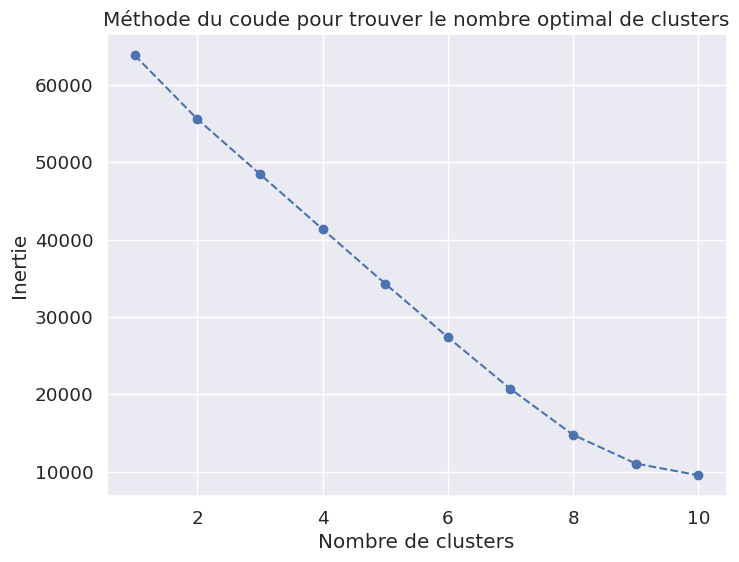

In [190]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

selected_features = ['Rating', 'Reviews', 'Installs', 'kw_Free', 'kw_App', 'kw_Mobile', 'kw_Pro', 'kw_News', 'kw_Easy', 'kw_Official']

# Filtrer les données pour ne garder que les caractéristiques sélectionnées
data_filtered = data[selected_features]

# Gérer les valeurs manquantes ou les données non numériques si nécessaire
# data_filtered = data_filtered.dropna() # Pour supprimer les lignes avec des valeurs manquantes
# data_filtered = data_filtered.select_dtypes(include=['number']) # Pour sélectionner uniquement les colonnes numériques

# Normaliser les données
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_filtered)

# Initialisation d'une liste pour stocker les valeurs d'inertie
inertia = []

# Calcul de l'inertie pour différents nombres de clusters
for num_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)

# Tracer le graphique de l'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Nombre de clusters')
plt.ylabel("Inertie")
plt.title("Méthode du coude pour trouver le nombre optimal de clusters")
plt.show()

In [191]:
num_clusters = 8

# Appliquer KMeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_normalized)

# Ajouter les labels de cluster à vos données
data_filtered['Cluster'] = kmeans.labels_

# Afficher les résultats du clustering
print(data_filtered.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Rating  Reviews    Installs  kw_Free  kw_App  kw_Mobile  kw_Pro  kw_News  \
0     4.1      159     10000.0        0       0          0       0        0   
1     3.9      967    500000.0        0       0          0       0        0   
2     4.7    87510   5000000.0        0       1          0       0        0   
3     4.5   215644  50000000.0        0       0          0       0        0   
4     4.3      967    100000.0        0       0          0       0        0   

   kw_Easy  kw_Official  Cluster  
0        0            0        1  
1        0            0        1  
2        0            0        7  
3        0            0        1  
4        0            0        1  


<ipython-input-191-797c3fd6d834>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['Cluster'] = kmeans.labels_


## resultats généraux

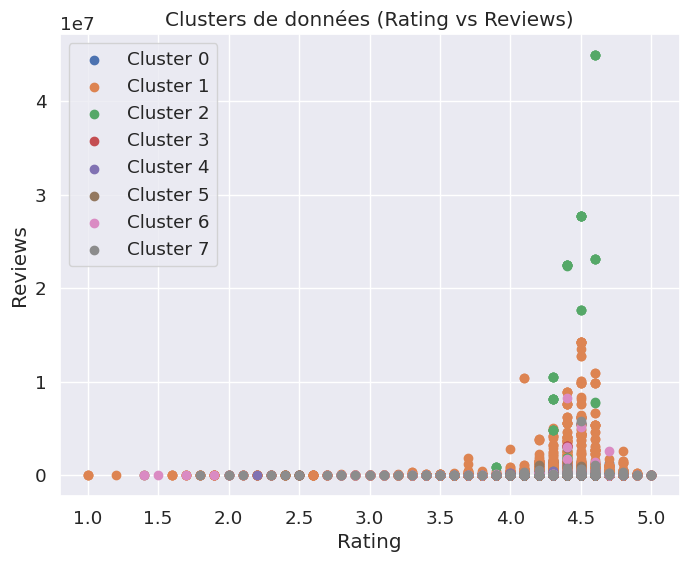

In [192]:
import matplotlib.pyplot as plt

feature1 = 'Rating'
feature2 = 'Reviews'

plt.figure(figsize=(8, 6))

for cluster in range(num_clusters):
    cluster_data = data_filtered[data_filtered['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Clusters de données ({feature1} vs {feature2})')
plt.legend()
plt.show()

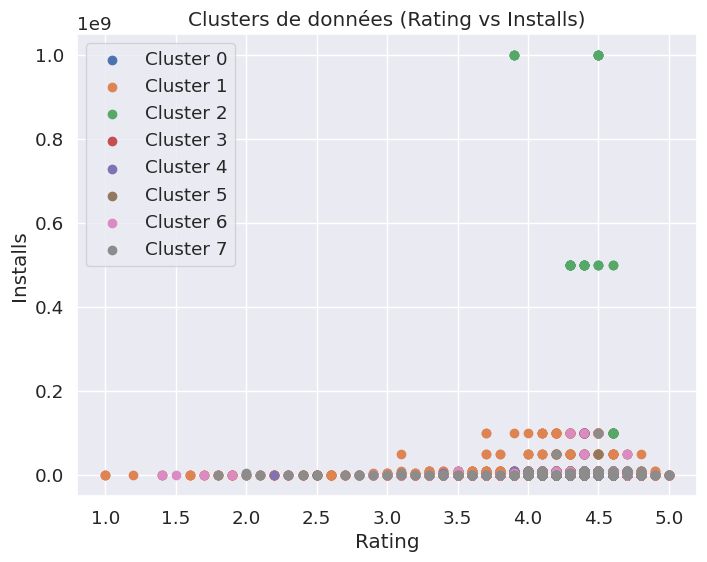

In [193]:
import matplotlib.pyplot as plt

feature1 = 'Rating'
feature2 = 'Installs'

plt.figure(figsize=(8, 6))

for cluster in range(num_clusters):
    cluster_data = data_filtered[data_filtered['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Clusters de données ({feature1} vs {feature2})')
plt.legend()
plt.show()

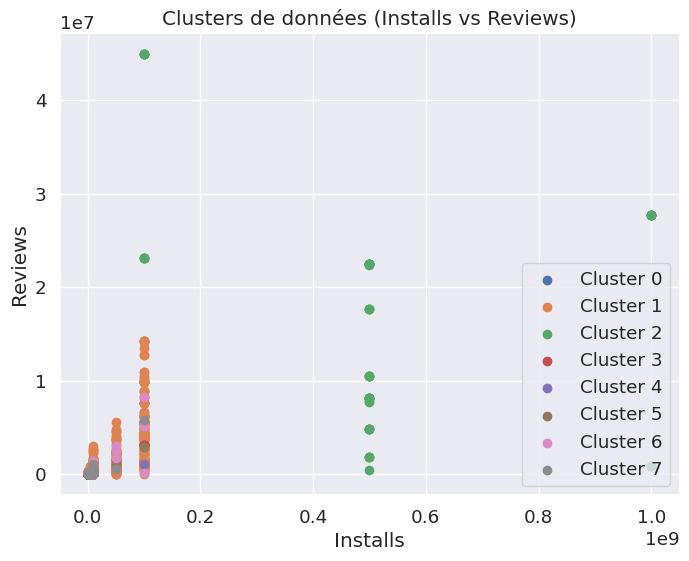

In [194]:
import matplotlib.pyplot as plt

feature1 = 'Installs'
feature2 = 'Reviews'

plt.figure(figsize=(8, 6))

for cluster in range(num_clusters):
    cluster_data = data_filtered[data_filtered['Cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Clusters de données ({feature1} vs {feature2})')
plt.legend()
plt.show()

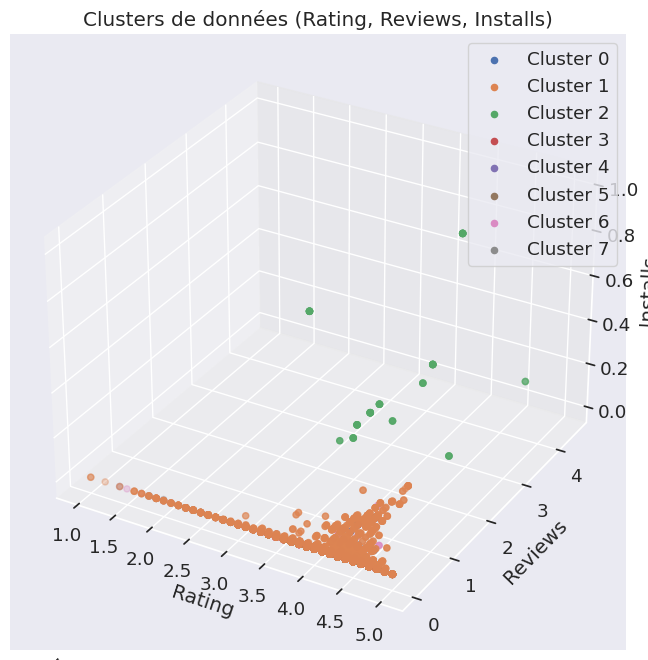

In [195]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters):
    cluster_data = data_filtered[data_filtered['Cluster'] == cluster]
    ax.scatter(cluster_data['Rating'], cluster_data['Reviews'], cluster_data['Installs'], label=f'Cluster {cluster}')

ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Installs')
ax.set_title('Clusters de données (Rating, Reviews, Installs)')
plt.legend()
plt.show()

cluster 1 et 2 ont l'air interressants :
mais ils ne contiennent presque pas d'app avec des mots clés

mais ou sont les app avec mots clés ?

## résultats par cluster

In [197]:
cluster0 = data_filtered[data_filtered['Cluster'] == 0]

print(cluster0['kw_Free'].sum())
print(cluster0['kw_Mobile'].sum())
print(cluster0['kw_Pro'].sum())
print(cluster0['kw_News'].sum())
print(cluster0['kw_Easy'].sum())
print(cluster0['kw_Official'].sum())
print(cluster0['kw_App'].sum())

274
0
0
0
0
0
0


In [198]:
cluster1 = data_filtered[data_filtered['Cluster'] == 1]

print(cluster1['kw_Free'].sum())
print(cluster1['kw_Mobile'].sum())
print(cluster1['kw_Pro'].sum())
print(cluster1['kw_News'].sum())
print(cluster1['kw_Easy'].sum())
print(cluster1['kw_Official'].sum())
print(cluster1['kw_App'].sum())

0
0
0
0
0
0
0


In [199]:
cluster2 = data_filtered[data_filtered['Cluster'] == 2]

print(cluster2['kw_Free'].sum())
print(cluster2['kw_Mobile'].sum())
print(cluster2['kw_Pro'].sum())
print(cluster2['kw_News'].sum())
print(cluster2['kw_Easy'].sum())
print(cluster2['kw_Official'].sum())
print(cluster2['kw_App'].sum())

0
0
0
4
0
0
0


In [200]:
cluster3 = data_filtered[data_filtered['Cluster'] == 3]

print(cluster3['kw_Free'].sum())
print(cluster3['kw_Mobile'].sum())
print(cluster3['kw_Pro'].sum())
print(cluster3['kw_News'].sum())
print(cluster3['kw_Easy'].sum())
print(cluster3['kw_Official'].sum())
print(cluster3['kw_App'].sum())

0
0
0
0
29
0
0


In [201]:
cluster4 = data_filtered[data_filtered['Cluster'] == 4]

print(cluster4['kw_Free'].sum())
print(cluster4['kw_Mobile'].sum())
print(cluster4['kw_Pro'].sum())
print(cluster4['kw_News'].sum())
print(cluster4['kw_Easy'].sum())
print(cluster4['kw_Official'].sum())
print(cluster4['kw_App'].sum())

2
2
0
101
0
0
3


In [196]:
cluster5 = data_filtered[data_filtered['Cluster'] == 5]

print(cluster5['kw_Free'].sum())
print(cluster5['kw_Mobile'].sum())
print(cluster5['kw_Pro'].sum())
print(cluster5['kw_News'].sum())
print(cluster5['kw_Easy'].sum())
print(cluster5['kw_Official'].sum())
print(cluster5['kw_App'].sum())

8
0
191
0
0
0
8


In [202]:
cluster6 = data_filtered[data_filtered['Cluster'] == 6]

print(cluster6['kw_Free'].sum())
print(cluster6['kw_Mobile'].sum())
print(cluster6['kw_Pro'].sum())
print(cluster6['kw_News'].sum())
print(cluster6['kw_Easy'].sum())
print(cluster6['kw_Official'].sum())
print(cluster6['kw_App'].sum())

0
171
1
0
0
0
11


In [203]:
cluster7 = data_filtered[data_filtered['Cluster'] == 7]

print(cluster7['kw_Free'].sum())
print(cluster7['kw_Mobile'].sum())
print(cluster7['kw_Pro'].sum())
print(cluster7['kw_News'].sum())
print(cluster7['kw_Easy'].sum())
print(cluster7['kw_Official'].sum())
print(cluster7['kw_App'].sum())

19
0
0
0
0
0
189


On n'apprend pas grand chose, les app sont regroupées par mots clés.. essayons avec un clustering plus petit qui forcera les app a etre regroupées autrement ?

# Clustering "forcé"

In [ ]:
num_clusters = 4

# Appliquer KMeans
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data_normalized)

# Ajouter les labels de cluster à vos données
data_filtered['Cluster2'] = kmeans.labels_

# Afficher les résultats du clustering
print(data_filtered.head())

## résultats généraux


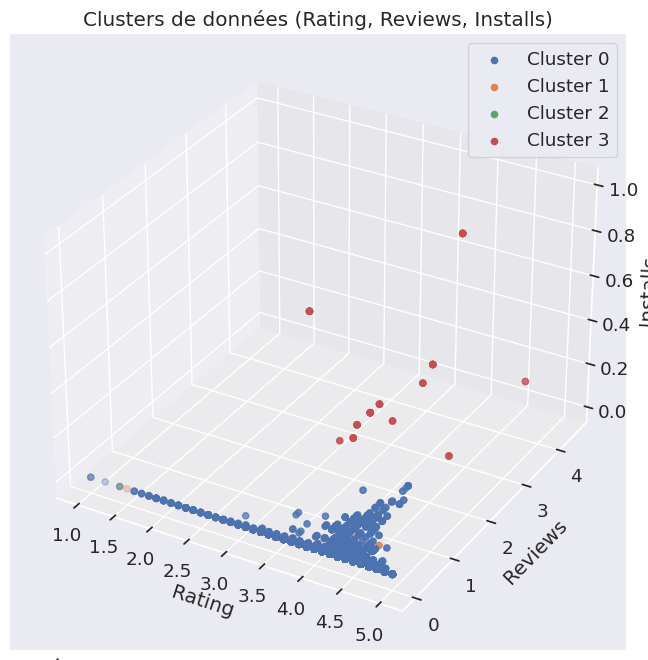

In [205]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in range(num_clusters):
    cluster_data = data_filtered[data_filtered['Cluster2'] == cluster]
    ax.scatter(cluster_data['Rating'], cluster_data['Reviews'], cluster_data['Installs'], label=f'Cluster {cluster}')

ax.set_xlabel('Rating')
ax.set_ylabel('Reviews')
ax.set_zlabel('Installs')
ax.set_title('Clusters de données (Rating, Reviews, Installs)')
plt.legend()
plt.show()

## resultats par cluster


In [206]:
cluster0 = data_filtered[data_filtered['Cluster2'] == 0]

print(cluster0['kw_Free'].sum())
print(cluster0['kw_Mobile'].sum())
print(cluster0['kw_Pro'].sum())
print(cluster0['kw_News'].sum())
print(cluster0['kw_Easy'].sum())
print(cluster0['kw_Official'].sum())

295
0
0
99
29
0


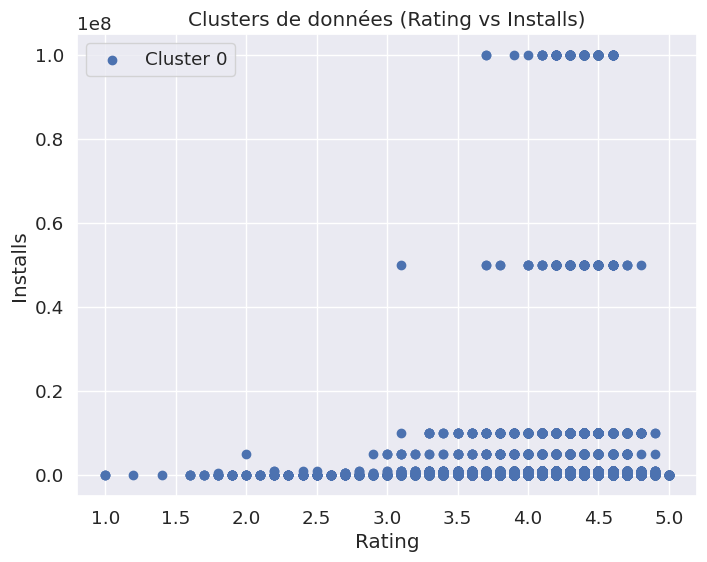

In [216]:
import matplotlib.pyplot as plt

feature1 = 'Rating'
feature2 = 'Installs'

plt.figure(figsize=(8, 6))

plt.scatter(cluster0[feature1], cluster0[feature2], label=f'Cluster 0')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Clusters de données ({feature1} vs {feature2})')
plt.legend()
plt.show()

In [208]:
cluster1 = data_filtered[data_filtered['Cluster2'] == 1]

print(cluster1['kw_Free'].sum())
print(cluster1['kw_Mobile'].sum())
print(cluster1['kw_Pro'].sum())
print(cluster1['kw_News'].sum())
print(cluster1['kw_Easy'].sum())
print(cluster1['kw_Official'].sum())

0
173
1
2
0
0


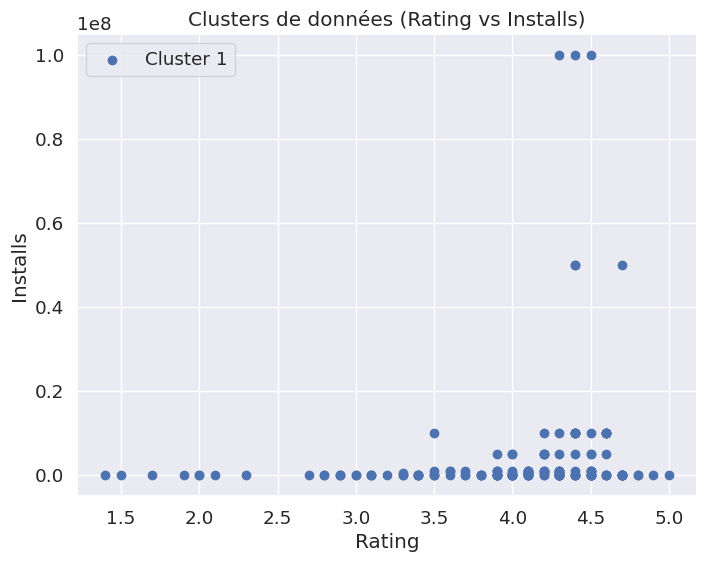

In [220]:
import matplotlib.pyplot as plt

feature1 = 'Rating'
feature2 = 'Installs'

plt.figure(figsize=(8, 6))

plt.scatter(cluster1[feature1], cluster1[feature2], label=f'Cluster 1')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Clusters de données ({feature1} vs {feature2})')
plt.legend()
plt.show()

In [209]:
cluster2 = data_filtered[data_filtered['Cluster2'] == 2]

print(cluster2['kw_Free'].sum())
print(cluster2['kw_Mobile'].sum())
print(cluster2['kw_Pro'].sum())
print(cluster2['kw_News'].sum())
print(cluster2['kw_Easy'].sum())
print(cluster2['kw_Official'].sum())

8
0
191
0
0
0


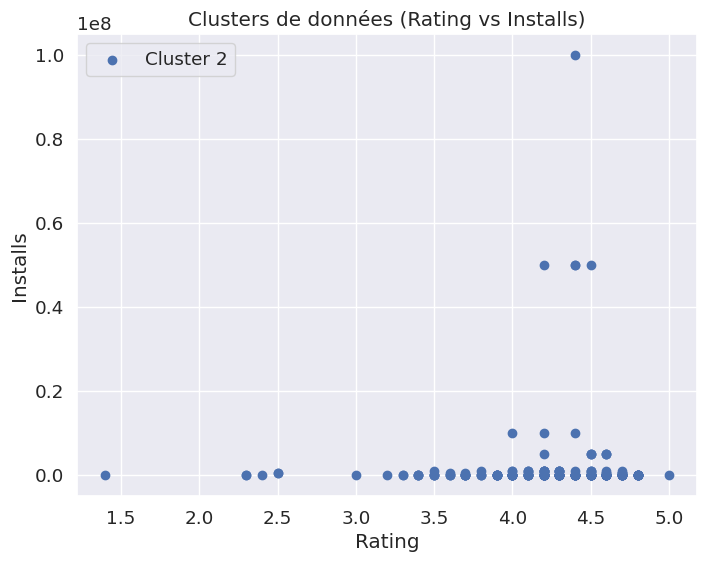

In [218]:
import matplotlib.pyplot as plt

feature1 = 'Rating'
feature2 = 'Installs'

plt.figure(figsize=(8, 6))

plt.scatter(cluster2[feature1], cluster2[feature2], label=f'Cluster 2')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Clusters de données ({feature1} vs {feature2})')
plt.legend()
plt.show()

In [210]:
cluster3 = data_filtered[data_filtered['Cluster2'] == 3]

print(cluster3['kw_Free'].sum())
print(cluster3['kw_Mobile'].sum())
print(cluster3['kw_Pro'].sum())
print(cluster3['kw_News'].sum())
print(cluster3['kw_Easy'].sum())
print(cluster3['kw_Official'].sum())

0
0
0
4
0
0


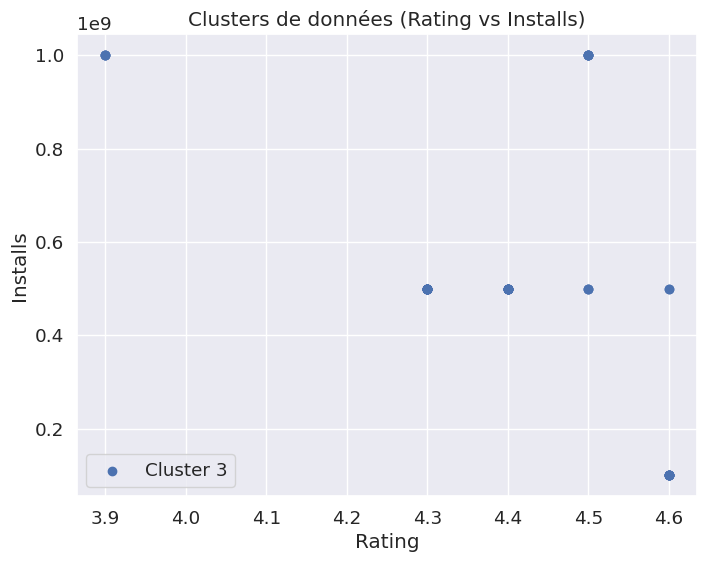

In [219]:
import matplotlib.pyplot as plt

feature1 = 'Rating'
feature2 = 'Installs'

plt.figure(figsize=(8, 6))

plt.scatter(cluster3[feature1], cluster3[feature2], label=f'Cluster 3')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Clusters de données ({feature1} vs {feature2})')
plt.legend()
plt.show()

In [211]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

data_filtered = data[selected_features]
data_normalized = pd.DataFrame(scaler.fit_transform(data_filtered))

# Calcul de la similarité cosinus
similarity_matrix = cosine_similarity(data_normalized.T)

# Affichage de la matrice de similarité (optionnel)
similarity_df = pd.DataFrame(similarity_matrix, columns=data_normalized.columns, index=data_normalized.columns)
print(similarity_df)

          0         1         2         3         4         5         6  \
0  1.000000  0.095316  0.065040  0.020119 -0.012216 -0.049344  0.005133   
1  0.095316  1.000000  0.625307 -0.010142 -0.017390 -0.012452 -0.023020   
2  0.065040  0.625307  1.000000 -0.002338 -0.019845 -0.015826 -0.022638   
3  0.020119 -0.010142 -0.002338  1.000000  0.045090 -0.033396 -0.000862   
4 -0.012216 -0.017390 -0.019845  0.045090  1.000000  0.031495  0.011706   
5 -0.049344 -0.012452 -0.015826 -0.033396  0.031495  1.000000 -0.020738   
6  0.005133 -0.023020 -0.022638 -0.000862  0.011706 -0.020738  1.000000   
7  0.016945 -0.013345  0.077158 -0.014345 -0.000846 -0.004243 -0.020443   
8  0.021123  0.008850  0.011830 -0.013533 -0.011217 -0.010129 -0.010686   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8    9  
0  0.016945  0.021123  0.0  
1 -0.013345  0.008850  0.0  
2  0.077158  0.011830  0.0  
3 -0.014345 -0.013533  0.0  
4 -0.000846 -0.011217  0.0  


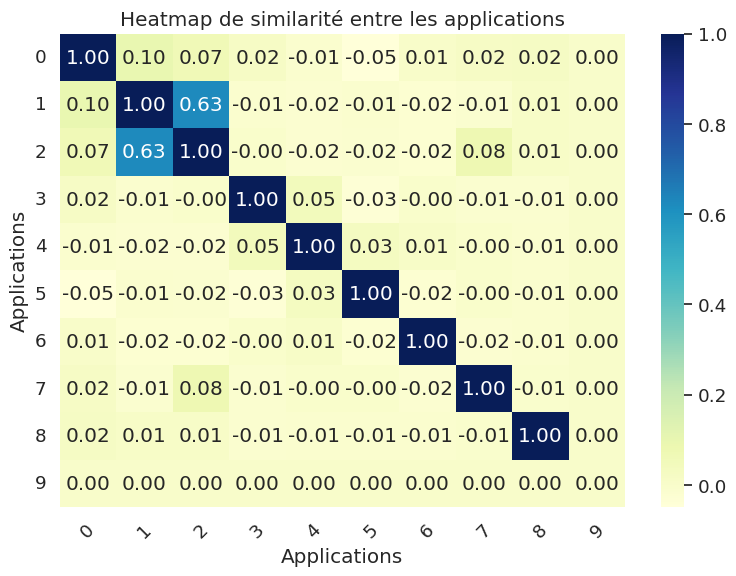

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
# Création du heatmap pour visualiser la matrice de similarité
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="YlGnBu", fmt=".2f", xticklabels=data_normalized.columns, yticklabels=data_normalized.columns)
plt.title('Heatmap de similarité entre les applications')
plt.xlabel('Applications')
plt.ylabel('Applications')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()